<a href="https://colab.research.google.com/github/samettavenkata/PUBG-Game-Data-Analysis/blob/master/Building_AI_Unabled_Face_Mask_Detector_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import tensorflow as tf 
import numpy as np

In [7]:
!wget "https://www.dropbox.com/s/1pe2o0bmstn5i1z/Updated%20Webinar_Day_2.zip"

--2022-02-05 16:33:56--  https://www.dropbox.com/s/1pe2o0bmstn5i1z/Updated%20Webinar_Day_2.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6034:18::a27d:5412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/1pe2o0bmstn5i1z/Updated%20Webinar_Day_2.zip [following]
--2022-02-05 16:33:56--  https://www.dropbox.com/s/raw/1pe2o0bmstn5i1z/Updated%20Webinar_Day_2.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucef4fe65e4b7b64a3fbc13d5bc3.dl.dropboxusercontent.com/cd/0/inline/BfLYUhrMIbHo_VFc3wgaEr7X9EEWKMOwQJhpDB2Z2oB0hVwOSIIWEOFEYCCSYpsNLDyb4hltyKjcT3UhWCSiyyX9GahI07ormVFJyHKsh9qlVzrjh0_uKuq5ac10iwzZ1ajXLXLQCRT9jjnTllCuoV2I/file# [following]
--2022-02-05 16:33:57--  https://ucef4fe65e4b7b64a3fbc13d5bc3.dl.dropboxusercontent.com/cd/0/inline/BfLYUhrMIbHo_VFc3wgaEr7X9EEWKMOwQJhpDB2Z2o

In [8]:
!unzip "Updated Webinar_Day_2.zip"
!rm "Updated Webinar_Day_2.zip"


Archive:  Updated Webinar_Day_2.zip
   creating: dataset/
   creating: dataset/without_mask/
  inflating: dataset/without_mask/0.jpg  
  inflating: dataset/without_mask/0_0_aidai_0014.jpg  
  inflating: dataset/without_mask/0_0_aidai_0029.jpg  
  inflating: dataset/without_mask/0_0_aidai_0043.jpg  
  inflating: dataset/without_mask/0_0_aidai_0074.jpg  
  inflating: dataset/without_mask/0_0_aidai_0084.jpg  
  inflating: dataset/without_mask/0_0_aidai_0136.jpg  
  inflating: dataset/without_mask/0_0_anhu_0004.jpg  
  inflating: dataset/without_mask/0_0_anhu_0020.jpg  
  inflating: dataset/without_mask/0_0_anhu_0025.jpg  
  inflating: dataset/without_mask/0_0_anhu_0027.jpg  
  inflating: dataset/without_mask/0_0_anhu_0056.jpg  
  inflating: dataset/without_mask/0_0_anhu_0057.jpg  
  inflating: dataset/without_mask/0_0_anhu_0062.jpg  
  inflating: dataset/without_mask/0_0_anhu_0063.jpg  
  inflating: dataset/without_mask/0_0_anhu_0098.jpg  
  inflating: dataset/without_mask/0_0_anhu_0103.j

In [9]:
width = 224
height = 224
#height and width are (224,224) since we will use the mobileNetv2 network
batch_size = 32
data_dir = "/content/dataset"

In [10]:
training = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.3,
    subset='training',
    seed=123,
    image_size=(height, width),
    batch_size=batch_size
)

Found 3692 files belonging to 2 classes.
Using 2585 files for training.


In [11]:
validation = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.3,
    subset='validation',
    seed=123,
    image_size=(height, width),
    batch_size=batch_size
)

Found 3692 files belonging to 2 classes.
Using 1107 files for validation.


In [12]:
classes = training.class_names
classes

['with_mask', 'without_mask']

In [13]:
training

<BatchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>

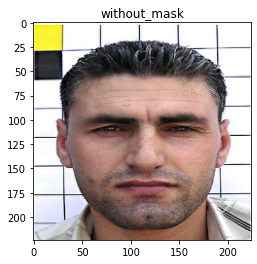

In [14]:
import matplotlib.pyplot as plt
for images, labels in training.take(1):
    plt.imshow(images[1].numpy().astype('uint8'))
    plt.title(classes[labels[1]])

In [15]:
from tensorflow.keras.applications import MobileNetV2

In [16]:
model = MobileNetV2(weights='imagenet')

14548992/14536120 [==============================] - 0s 0us/step


In [17]:
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

In [18]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [19]:
#face_mask_detection = model.fit(training,validation_data=validation,epochs=3)

In [20]:
img = tf.keras.preprocessing.image.load_img('face.jpg', target_size=(height, width))
#convert to array
image_array = tf.keras.preprocessing.image.img_to_array(img)
#expand dimensions to fit in the model
image_array = tf.expand_dims(image_array,0)
#check the shape of the image
image_array.shape

TensorShape([1, 224, 224, 3])

In [24]:
predictions = model.predict(image_array)
#using softmax to get the results
score = tf.nn.softmax(predictions[0])

In [28]:
import numpy
print(classes[numpy.argmax(score)], 100*numpy.max(score))

IndexError: ignored

In [26]:
model.save('dummy.model', save_format="h5")

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [27]:
from tensorflow.keras.models import load_model
detector = load_model(r'dummy.model')

In [29]:
import tensorflow as tf
import cv2
import numpy

#starting the video stream
cap = cv2.VideoCapture(0) 

#using the XML file for haarcascade classifier
classifier = cv2.CascadeClassifier(r"haarcascade_frontalface_default.xml")


In [30]:
while True:
    (success, frame) = cap.read()  #reading the frame from the stream 
    new_image = cv2.resize(frame, (frame.shape[1] // 1, frame.shape[0] // 1)) #resizing the frame to speed up the process of detection
    face = classifier.detectMultiScale(new_image) #detecting faces from the frame(ROI)
    for x,y,w,h in face:
        try:
            face_img = new_image[y:x+h, x:x+w] #getting the coordinates for the face detected
            resized= cv2.resize(face_img,(224,224)) #resizing the  face detected to fit into the model in the shape(224,224)
            image_array = tf.keras.preprocessing.image.img_to_array(resized) #converting the detected image into an array 
            image_array = tf.expand_dims(image_array,0) #expanding the dimensions to fit in the model
            predictions = detector.predict(image_array) #making predictions on the ROI
            score = tf.nn.softmax(predictions[0]) #getting the results 
            label = numpy.argmax(score)
        except Exception as e:
            print('bad frame')
            
        if label == 0:
            cv2.rectangle(new_image,(x,y),(x+w,y+h),(0,255,0),2)
            cv2.putText(new_image,"mask",(x,y),cv2.FONT_HERSHEY_SIMPLEX,0.8,(0,255,0), 2)
        elif label == 1:
            cv2.rectangle(new_image,(x,y),(x+w,y+h),(0,0,255),2)
            cv2.putText(new_image,'no_mask',(x,y),cv2.FONT_HERSHEY_SIMPLEX,0.8,(0,0,255), 2)
        else:
            None
    #displaying the window after predicting the outcome
    cv2.imshow('face_window', new_image)
    print(numpy.argmax(score), 100*numpy.max(score))
    #waitkey to terminate the loop
    key = cv2.waitKey(10) 
    if key == ord('q'):
        break
#release the stream 
cap.release()
cv2.destroyAllWindows()

AttributeError: ignored